In [1]:
import html2text
from markdownify import markdownify as md
from markdownify import MarkdownConverter
import re
import itertools
from bs4 import BeautifulSoup


In [2]:
apple_fp = "/Users/atriviveksharma/Desktop/SafeIntelligence/LLM_experiments/datasets/FinDER/10k/AAPL.html"

In [3]:
with open(apple_fp, "r") as f:
    html_content = f.read()

text_maker = html2text.HTML2Text()
text_maker.ignore_links = True
plain_text = text_maker.handle(html_content)


In [4]:
with open('apple.md', 'w') as f:
    f.write(plain_text)

In [5]:
table_tag_names = {"table", "thead", "tbody", "tfoot", "tr", "th", "td"}

def is_italicized(tag):
    italic_tags = {"i", "em"}
    for node in [tag, *getattr(tag, "descendants", [])]:
        name = getattr(node, "name", None)
        if name in italic_tags:
            return True
        style = getattr(node, "attrs", {}).get("style", "")
        style_lower = style.lower()
        if "font-style" in style_lower and "italic" in style_lower:
            return True
    return False

def is_in_table(tag):
    for node in [tag, *getattr(tag, "descendants", [])]:
        if getattr(node, "name", None) in table_tag_names:
            return True
    return False
        

def promote_weighted_headings(html, weight_threshold=700):
    soup = BeautifulSoup(html, "html.parser")
    for div in soup.find_all("div"):
        
        
        if is_in_table(div):
            continue
        
        if is_italicized(div):
            continue
        if max_font_weight(div) >= weight_threshold:
            heading_text = div.get_text(separator=" ", strip=True)
            if heading_text:
                heading = soup.new_tag("h1")
                heading.string = heading_text
                div.replace_with(heading)
    return str(soup)

def max_font_weight(tag):
    max_weight = -1
    for node in [tag, *getattr(tag, "descendants", [])]:
        style = getattr(node, "attrs", {}).get("style", "")
        match = re.search(r"font-weight\s*:\s*([^;]+)", style, re.IGNORECASE)
        if match:
            value = match.group(1).strip().lower()
            weight = int(value) if value.isdigit() else {"bold": 700, "bolder": 800}.get(value, -1)
            max_weight = max(max_weight, weight)
    return max_weight

In [6]:
decorated_html = promote_weighted_headings(html_content)

In [7]:
mdf = md(decorated_html, heading_style="ATX")
with open('apple_md.md', 'w') as f:
    f.write(mdf)

In [8]:
soup = BeautifulSoup(html_content, "html.parser")
for div in soup.find_all("div"):
    debug_text = "Weighted-average basic shares outstanding"
    txt = div.get_text(separator=" ", strip=True)
    
    if debug_text in txt:
        print("Found debug text in div:", txt)
        break
    
div

Found debug text in div: 2024 2023 2022 Numerator: Net income $ 93,736 $ 96,995 $ 99,803 Denominator: Weighted-average basic shares outstanding 15,343,783 15,744,231 16,215,963 Effect of dilutive share-based awards 64,312 68,316 109,856 Weighted-average diluted shares 15,408,095 15,812,547 16,325,819 Basic earnings per share $ 6.11 $ 6.16 $ 6.15 Diluted earnings per share $ 6.08 $ 6.13 $ 6.11


<div style="margin-top:3pt;text-align:justify"><table style="border-collapse:collapse;display:inline-table;margin-bottom:5pt;vertical-align:text-bottom;width:100.000%"><tr><td style="width:1.0%"></td><td style="width:59.280%"></td><td style="width:0.1%"></td><td style="width:1.0%"></td><td style="width:11.619%"></td><td style="width:0.1%"></td><td style="width:0.1%"></td><td style="width:0.530%"></td><td style="width:0.1%"></td><td style="width:1.0%"></td><td style="width:11.619%"></td><td style="width:0.1%"></td><td style="width:0.1%"></td><td style="width:0.530%"></td><td style="width:0.1%"></td><td style="width:1.0%"></td><td style="width:11.622%"></td><td style="width:0.1%"></td></tr><tr><td colspan="3" style="padding:0 1pt"></td><td colspan="3" style="padding:2px 1pt;text-align:center;vertical-align:bottom"><span style="color:#000000;font-family:'Helvetica',sans-serif;font-size:8pt;font-weight:700;line-height:100%">2024</span></td><td colspan="3" style="padding:0 1pt"></td><td col

In [9]:
for node in [div, *getattr(div, "descendants", [])]:
    if getattr(node, "name", None) in table_tag_names:
        print("Node in table:", node)
    

Node in table: <table style="border-collapse:collapse;display:inline-table;margin-bottom:5pt;vertical-align:text-bottom;width:100.000%"><tr><td style="width:1.0%"></td><td style="width:59.280%"></td><td style="width:0.1%"></td><td style="width:1.0%"></td><td style="width:11.619%"></td><td style="width:0.1%"></td><td style="width:0.1%"></td><td style="width:0.530%"></td><td style="width:0.1%"></td><td style="width:1.0%"></td><td style="width:11.619%"></td><td style="width:0.1%"></td><td style="width:0.1%"></td><td style="width:0.530%"></td><td style="width:0.1%"></td><td style="width:1.0%"></td><td style="width:11.622%"></td><td style="width:0.1%"></td></tr><tr><td colspan="3" style="padding:0 1pt"></td><td colspan="3" style="padding:2px 1pt;text-align:center;vertical-align:bottom"><span style="color:#000000;font-family:'Helvetica',sans-serif;font-size:8pt;font-weight:700;line-height:100%">2024</span></td><td colspan="3" style="padding:0 1pt"></td><td colspan="3" style="padding:2px 1pt;

In [23]:
from langchain_text_splitters import MarkdownHeaderTextSplitter


In [24]:
headers_to_split_on = [("#", "Header 1")]

split_text = MarkdownHeaderTextSplitter(headers_to_split_on=headers_to_split_on, strip_headers=False).split_text(mdf)

In [25]:
len(split_text)

150

In [26]:
split_text

[Document(metadata={}, page_content="xml version='1.0' encoding='ASCII'?  \naapl-20240928  \nfalse2024FY0000320193P1YP1YP1YP1Yhttp://fasb.org/us-gaap/2024#MarketableSecuritiesCurrent http://fasb.org/us-gaap/2024#MarketableSecuritiesNoncurrenthttp://fasb.org/us-gaap/2024#MarketableSecuritiesCurrent http://fasb.org/us-gaap/2024#MarketableSecuritiesNoncurrenthttp://fasb.org/us-gaap/2024#LongTermDebtCurrent http://fasb.org/us-gaap/2024#LongTermDebtNoncurrenthttp://fasb.org/us-gaap/2024#LongTermDebtCurrent http://fasb.org/us-gaap/2024#LongTermDebtNoncurrenthttp://fasb.org/us-gaap/2024#OtherAssetsNoncurrenthttp://fasb.org/us-gaap/2024#OtherAssetsNoncurrenthttp://fasb.org/us-gaap/2024#PropertyPlantAndEquipmentNethttp://fasb.org/us-gaap/2024#PropertyPlantAndEquipmentNethttp://fasb.org/us-gaap/2024#OtherLiabilitiesCurrenthttp://fasb.org/us-gaap/2024#OtherLiabilitiesCurrenthttp://fasb.org/us-gaap/2024#OtherLiabilitiesNoncurrenthttp://fasb.org/us-gaap/2024#OtherLiabilitiesNoncurrenthttp://fasb.or

In [ ]:
table_tag_names = {"table", "thead", "tbody", "tfoot", "tr", "th", "td"}

def is_italicized(tag):
    italic_tags = {"i", "em"}
    for node in [tag, *getattr(tag, "descendants", [])]:
        name = getattr(node, "name", None)
        if name in italic_tags:
            return True
        style = getattr(node, "attrs", {}).get("style", "")
        style_lower = style.lower()
        if "font-style" in style_lower and "italic" in style_lower:
            return True
    return False

def is_in_table(tag):
    for node in [tag, *getattr(tag, "descendants", [])]:
        if getattr(node, "name", None) in table_tag_names:
            return True
    return False
        

def promote_weighted_headings(html, weight_threshold=700):
    soup = BeautifulSoup(html, "html.parser")
    for div in soup.find_all("div"):
        
        
        if is_in_table(div):
            continue
        
        if is_italicized(div):
            continue
        if max_font_weight(div) >= weight_threshold:
            heading_text = div.get_text(separator=" ", strip=True)
            if heading_text:
                heading = soup.new_tag("h1")
                heading.string = heading_text
                div.replace_with(heading)
    return str(soup)

def max_font_weight(tag):
    max_weight = -1
    for node in [tag, *getattr(tag, "descendants", [])]:
        style = getattr(node, "attrs", {}).get("style", "")
        match = re.search(r"font-weight\s*:\s*([^;]+)", style, re.IGNORECASE)
        if match:
            value = match.group(1).strip().lower()
            weight = int(value) if value.isdigit() else {"bold": 700, "bolder": 800}.get(value, -1)
            max_weight = max(max_weight, weight)
    return max_weight

def add_document_name_to_chunks(chunks, document_name):
    for chunk in chunks:
        chunk.metadata["document_name"] = document_name
        chunk.page_content = f"{document_name}\n\n{chunk.page_content}"
    return chunks

def get_chunked_texts(html_fp):
    
    with open(html_fp, "r") as f:
        html_content = f.read()
        
    document_name = html_fp.split("/")[-1].replace(".html", "")

    decorated_html = promote_weighted_headings(html_content)

    mdf = md(decorated_html, heading_style="ATX")

    headers_to_split_on = [("#", "Header 1")]

    split_text = MarkdownHeaderTextSplitter(headers_to_split_on=headers_to_split_on, strip_headers=False).split_text(mdf)
    
    split_text = add_document_name_to_chunks(split_text, document_name)

    return split_text
    

In [30]:
import pandas as pd

In [32]:
doc_lengths = []

for doc in split_text:
    doc_lengths.append(len(doc.page_content))


df = pd.DataFrame(doc_lengths)

<Axes: ylabel='Frequency'>

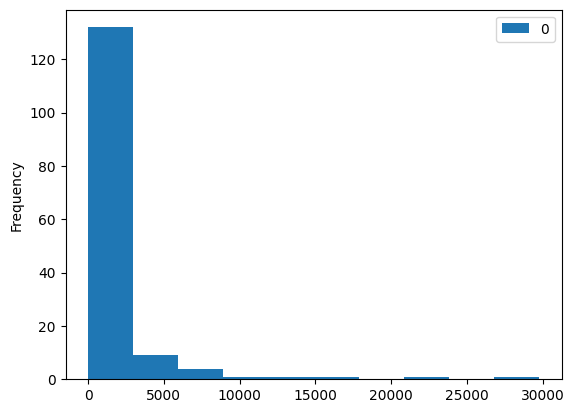

In [41]:
df.plot.hist(bins=10)

In [45]:
num=0
for doc in split_text:
    if len(doc.page_content) < 50:
        num+=1
        # print(doc.page_content)
        # print("-----")
print(f"Number of documents with less than 50 characters: {num}")

Number of documents with less than 50 characters: 26
